In [ ]:
# Import essential libraries
import requests
import cv2
import numpy as np
import imutils
  
# Replace the below URL with your own. Make sure to add "/shot.jpg" at last.
url = "http://192.168.43.1:8080/shot.jpg"
  
# fetching data from the Url
img_resp = requests.get(url)
img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
img = cv2.imdecode(img_arr, -1)
img = imutils.resize(img, width=256, height=256)

# Capture the image and save with the name "cap.jpg"
cv2.imwrite("lettuce.jpg", img)
  
# Release the video stream
cv2.destroyAllWindows()

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model
model_dir = 'C:\\Users\\alexc\\OneDrive - Universiti Teknologi PETRONAS\\Uni Stuff\\Final Year Sem3\\FYP2\\models\\5\\lettuce_prediction_model.h5' 
model = load_model(model_dir)

In [50]:
class_names = ["Healthy", "Infected"]

In [51]:
class_names

['Healthy', 'Infected']

In [67]:
# Capture and preprocess the image
img_dir = 'C:\\Users\\alexc\\OneDrive - Universiti Teknologi PETRONAS\\Uni Stuff\\Final Year Sem3\\FYP2\\lettuce4.jpg'
img = cv2.imread(img_dir)
img = cv2.resize(img, (256, 256))
lec_img = np.expand_dims(img, 0)

1/1 [==============================] - 0s 36ms/step
Predicted Label: Infected
Confidence: 66.41


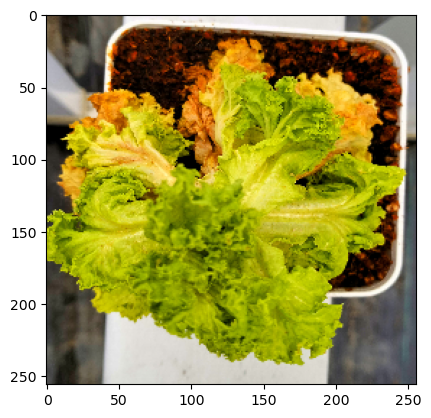

In [68]:
prediction = model.predict(lec_img)
predicted_class = class_names[np.argmax(prediction[0])]
confidence = round(100 * (np.max(prediction[0])), 2)

print("Predicted Label:",predicted_class)
print("Confidence:",confidence)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [13]:
help(model)

Help on Sequential in module keras.engine.sequential object:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.S